In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

In [5]:
# Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# DATA CLEANING 

In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#Now lets fill the null values of BMI column with appropriate values
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [9]:
#filling with mean values
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [10]:
data['bmi'].isnull().sum()

0

In [11]:
# Now we are not having any null values.

In [12]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [13]:
data.drop('id',axis=1,inplace=True) #axis = 1 because id is column, which means axis=1 for columns and 0 for rows

In [14]:
data.shape #Now we have 11 columns

(5110, 11)

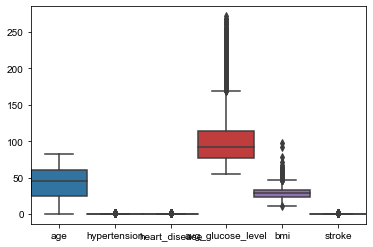

In [15]:
#Outlier Removing
sns.boxplot(data=data, width=1)
sns.set(rc={'figure.figsize':(10,12)}) # To set the size of the graph

In [16]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [17]:
(data['avg_glucose_level']>114.090000).sum()

1277

In [18]:
#Instead of removing the high values, we will keep them because abnormality will lead to strokes generally.

In [19]:
data.info() # There are 5 object data types....therefore we will have to do encoding.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# LABEL ENCODING 

In [20]:
#ENCODING
#Label Encoding
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [21]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [22]:
data['gender'] = enc.fit_transform(data['gender'])

In [23]:
data['smoking_status'] = enc.fit_transform(data['smoking_status'])

In [24]:
data['work_type'] = enc.fit_transform(data['work_type'])

In [25]:
data['Residence_type'] = enc.fit_transform(data['Residence_type'])

In [26]:
data['ever_married'] = enc.fit_transform(data['ever_married'])

In [27]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [29]:
#Splitting the data for training and testing part

# SPLITTING DATA

In [30]:
X = data.drop('stroke',axis=1)
Y = data['stroke']

In [31]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [32]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

# TRAINING AND TESTING DATA

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [34]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2


In [35]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3


In [36]:
Y_train.shape

(4088,)

In [37]:
Y_test.shape

(1022,)

In [38]:
# Normalizing the data

In [39]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [40]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [41]:
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# SAVING THE SCALER OBJECT AS MODEL

In [43]:
import pickle
import os

In [44]:
#Lets save the scalar object
scaler_path = os.path.join('E:/ML Projects/Heart-Stroke Prediction Project Copy/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [45]:
X_train

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [46]:
X_test

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

# DECISION TREE CLASSIFIER

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [48]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [49]:
dt.feature_importances_ # Importance of each feature columnwise

array([0.03355223, 0.18371427, 0.02312242, 0.02311328, 0.00296279,
       0.04123828, 0.04548107, 0.34687067, 0.2351468 , 0.06479819])

In [50]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [51]:
Y_pred = dt.predict(X_test)

In [52]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [53]:
#Comparing our results

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
ac_dt = accuracy_score(Y_test,Y_pred)

In [57]:
ac_dt

0.9070450097847358

In [58]:
import joblib
model_path = os.path.join('E:/ML Projects/Heart-Stroke Prediction Project Copy/','models/dt.sav')
joblib.dump(dt,model_path)

['E:/ML Projects/Heart-Stroke Prediction Project Copy/models/dt.sav']

# LOGISTIC REGRESSION CLASSIFIER 

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [60]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [61]:
Y_pred_lr = lr.predict(X_test)

In [62]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [64]:
ac_lr = accuracy_score(Y_test,Y_pred_lr)

In [65]:
ac_lr 

0.9471624266144814

# KNN CLASSIFIER

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [67]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [68]:
Y_pred_knn = knn.predict(X_test)

In [69]:
Y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
ac_knn = accuracy_score(Y_test,Y_pred_knn)

In [71]:
ac_knn

0.9452054794520548

# RANDOM FOREST CLASSIFIER

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [73]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [74]:
Y_pred_rf = rf.predict(X_test)

In [75]:
Y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
ac_rf = accuracy_score(Y_test,Y_pred_rf)

In [77]:
ac_rf

0.9442270058708415